In [1]:
from mpl_toolkits import mplot3d as a3
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [2]:
def plot(camera_origin, plane_origin, ax):  
    
    data = np.concatenate(([camera_origin], [plane_origin]))

    x, y, z = data.T

    ax.scatter3D(x, y, z, c="black", cmap='hsv');
    ax.plot(x, y, z, c="black")
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    
def intersect(camera_origin, direction, plane_origin, normal):   

    # Zero (or close to it) means ray and plane are orthogonal (do not intersect)
    # Negative number means the plane is behind the ray. 
    if np.dot(direction, normal) > 0:
        t = (np.divide(np.dot(np.subtract(plane_origin, camera_origin), normal), np.dot(direction, normal)))
        p = np.add(camera_origin ,np.multiply(direction, t))
        
        #print(f"Camera {camera_origin} with direction {direction} intersects the plane at {p}. Orthogonal value is {np.dot(direction, normal)}")
        
        return True, p
    else:
        return False, None
    
def rotateRay(ray, yaw, pitch, roll):
    sin_alpha = math.sin(yaw)
    sin_beta = math.sin(pitch)
    sin_gamma = math.sin(roll)
    
    cos_alpha = math.cos(yaw)
    cos_beta = math.cos(pitch)
    cos_gamma = math.cos(roll)
    
    # varialbe represents rotation matrix position
    m00 = cos_alpha * cos_beta
    m01 = cos_alpha * sin_beta * sin_gamma - sin_alpha * cos_gamma
    m02 = cos_alpha * sin_beta * cos_gamma + sin_alpha * sin_gamma
    m10 = sin_alpha * cos_beta
    m11 = sin_alpha * sin_beta * sin_gamma + cos_alpha * cos_gamma
    m12 = sin_alpha * sin_beta * cos_gamma - cos_alpha * sin_gamma
    m20 = -sin_beta
    m21 = cos_beta * sin_gamma
    m22 = cos_beta * cos_gamma   
    
    rotation_matrix = np.array([[m00, m01, m02],
                               [m10, m11, m12],
                               [m20, m21, m22]])
    
    #print(f"rotation:\n{rotation_matrix}")
    
    x = rotation_matrix[0][0] * ray[0] + rotation_matrix[0][1] * ray[1]+ rotation_matrix[0][2] * ray[2]
    y = rotation_matrix[1][0] * ray[0] + rotation_matrix[1][1] * ray[1]+ rotation_matrix[1][2] * ray[2]
    z = rotation_matrix[2][0] * ray[0] + rotation_matrix[2][1] * ray[1]+ rotation_matrix[2][2] * ray[2]
    #print(f"ray {ray} rotated to {[x,y,z]}")
    return [x,y,z]


In [3]:
f = 15 
pixel_size = 3.31439 #micrometers
pixels_height = 3956
pixels_width = 5280
            
pixelmm = pixel_size * 0.001

sensor_height = pixels_height * pixelmm; #13.11172684
sensor_width = pixels_width * pixelmm; #17.4999792

pi = math.pi;

horizontal_fov = 2 * math.atan(sensor_width * 0.5 / f) * (180/pi); 
vertical_fov = 2 * math.atan(sensor_height * 0.5 / f) * (180/pi);

# Used for development. 
#horizontal_fov = 57.6;
#vertical_fov = 43.2;

print(f"The camera has an FOV of {horizontal_fov} by {vertical_fov}")

The camera has an FOV of 60.51281504817404 by 47.21619401533894


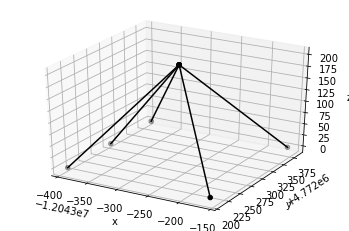

In [4]:
# Output should be in radians
horizontal = math.tan((horizontal_fov / 2)*(math.pi/180))
vertical = math.tan((vertical_fov / 2)*(math.pi/180))

camera_origin = np.array([-12043276.333264586,4772295.890307892,200])
plane_origin = np.array([0,0,0])
normal = np.array([0,0,1])
#directions = np.array([[horizontal, vertical, 1],
#                       [-horizontal, vertical, 1], 
#                       [horizontal, -vertical, 1], 
#                       [-horizontal, -vertical, 1]])
directions = np.array([[horizontal, vertical, 1],
                       [-horizontal, vertical, 1], 
                       [horizontal, -vertical, 1], 
                       [-horizontal, -vertical, 1],
                       [horizontal, 0, 1]])

fig = plt.figure()
ax = plt.axes(projection='3d')

for direction in directions:
    intersects, p = intersect(camera_origin, direction, plane_origin, normal)
    
    if intersects:
        plot(camera_origin, p, ax)
    else:
        print(f"{direction} does not intersect")

[[1.1086208456017814, 0.4370575613333333, 0.3335217977682427], [0.25537587452321553, 0.4370575613333333, 1.1291856054700982], [1.1086208456017814, -0.4370575613333333, 0.3335217977682427], [0.25537587452321553, -0.4370575613333333, 1.1291856054700982], [1.1086208456017814, 0.0, 0.3335217977682427]]


<IPython.core.display.Javascript object>


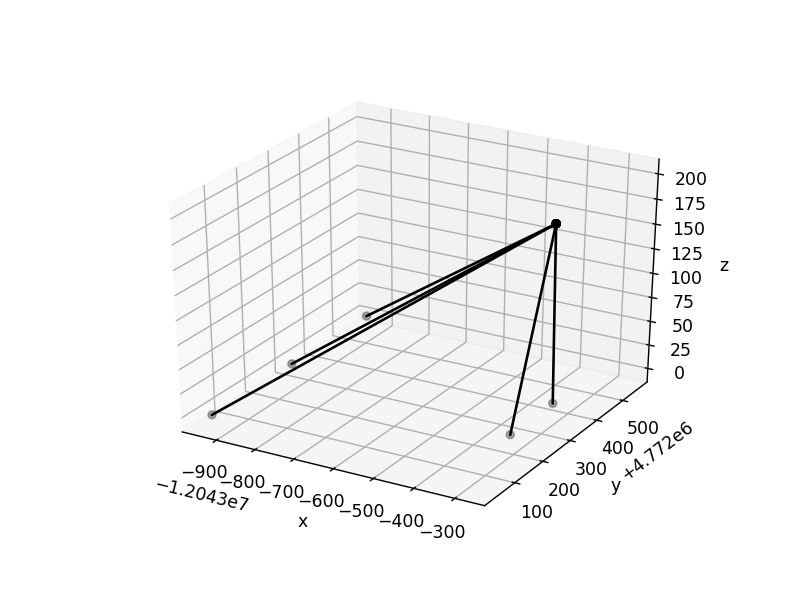

[array([-12043941.12990038,   4772033.80395296,         0.        ]), array([-12043321.56513316,   4772218.47919687,         0.        ]), array([-12043941.12990038,   4772557.97666282,         0.        ]), array([-12043321.56513316,   4772373.30141891,         0.        ]), array([-12043941.12990038,   4772295.89030789,         0.        ])]


In [128]:
yaw = math.radians(0) # z-axis
pitch = math.radians(43) # y-axis
roll = math.radians(0) # x-azis

rotated_directions = []
for direction in directions:
    new_direction = rotateRay(direction, roll, pitch, yaw)
    rotated_directions.append(new_direction)
print(rotated_directions)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(xlabel='x', ylabel='y', zlabel='z')

# Plot red line from camera-origin to ground.
#ax.plot([100,100], [100,100], [122,0], c="red");

intersections = []
for direction in rotated_directions:    
    intersects, p = intersect(camera_origin, direction, plane_origin, normal)
    
    if intersects:
        plot(camera_origin, p, ax)
        intersections.append(p)
    else:
        print(f"{direction} does not intersect")
print(intersections)